In [3]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print ("Dataset could not be loaded. Is the dataset missing?" )

Wholesale customers dataset has 440 samples with 6 features each.


#### Find relations between all the features.. we can find some correlations from this.

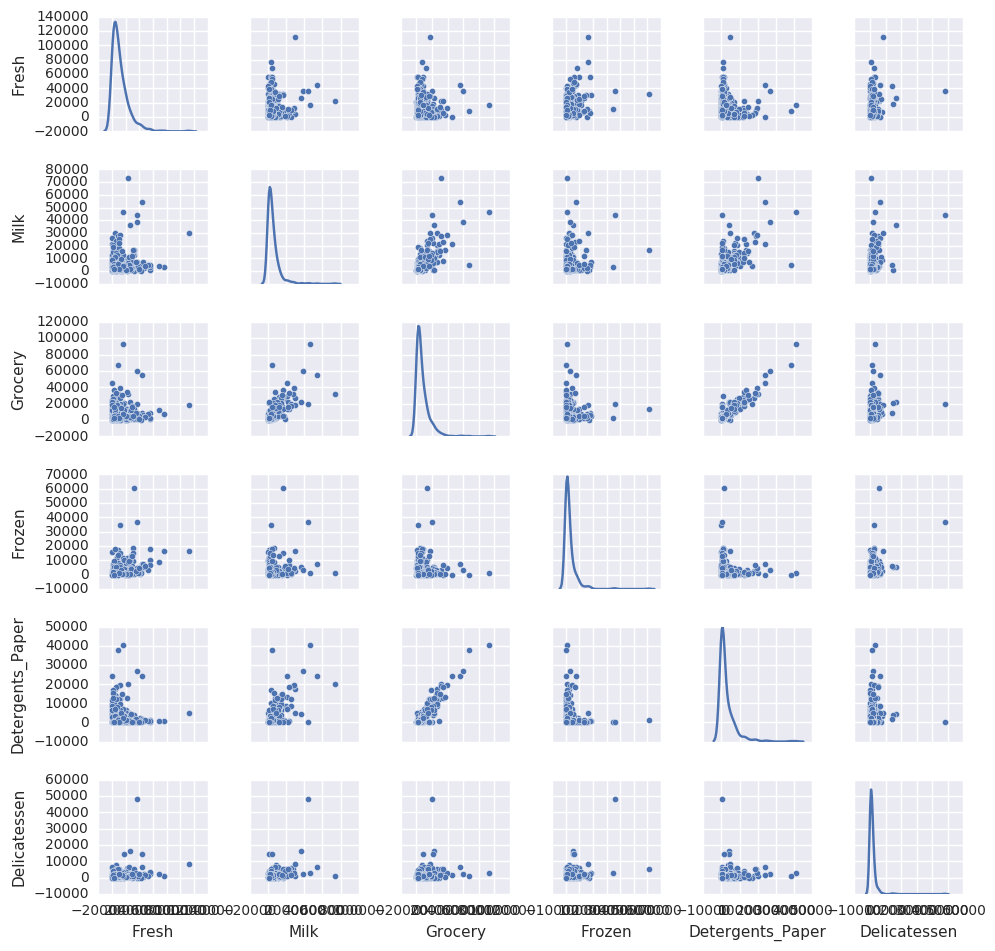

In [6]:
# Produce a scatter matrix for each pair of newly-transformed features

sns.pairplot(data, diag_kind="kde", size=1.6)

### Corelation matrix

- This is to cross-referec with the scatter matrix above to draw more accurate insights from the data.
- The higher the color is on the bar, the higher the correlation.


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = data.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(data, interpolation='nearest')
    ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);




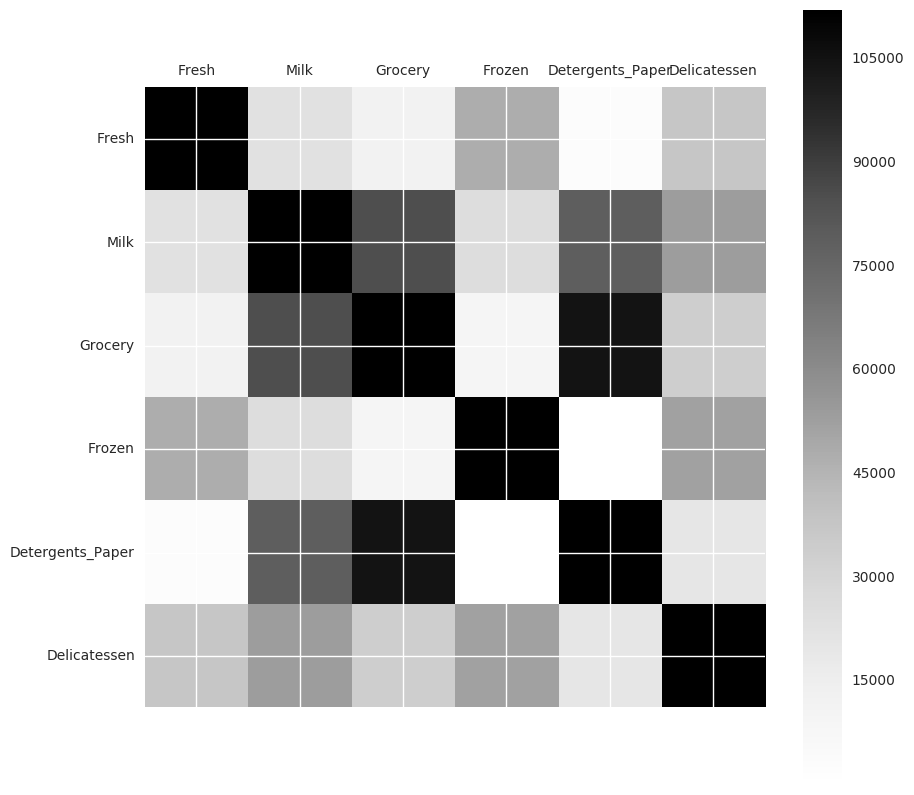

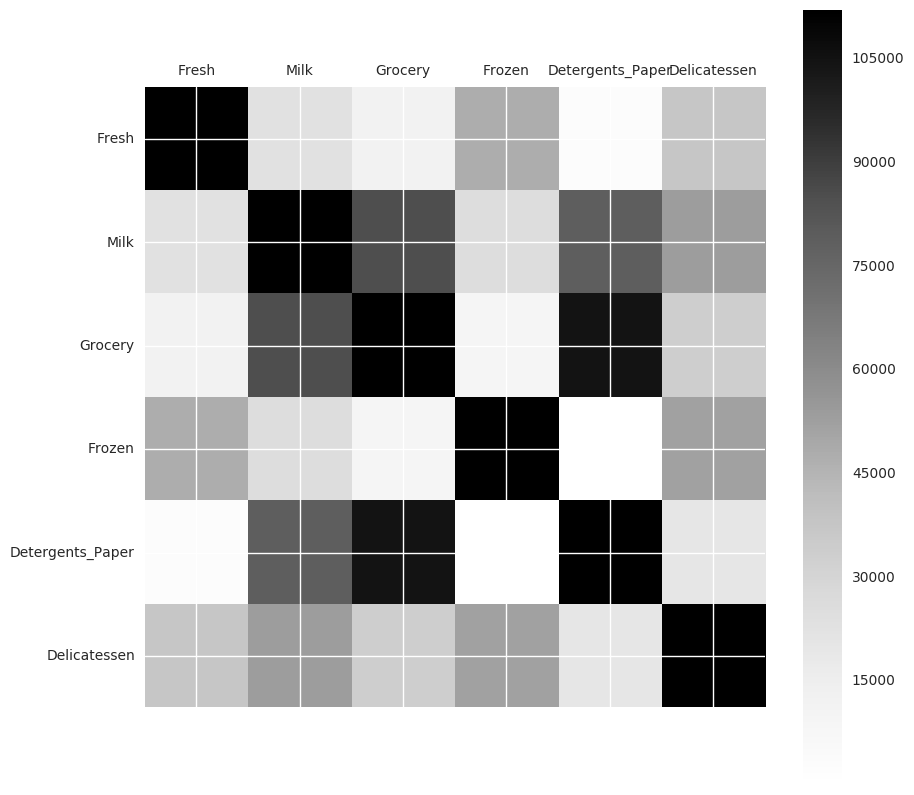

In [5]:
plot_corr(data)
plot_corr(np.log(data))

#### Finding outliers and duplicate outliers

In [14]:
import itertools

In [13]:
# Select the indices for data points you wish to remove
outliers_lst  = []

#minimizing outliers with log
log_data=np.log(data)

# For each feature find the data points with extreme high or low values
for feature in log_data.columns:
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data.loc[:, feature], 25)

    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data.loc[:, feature], 75)

    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)

    # Display the outliers
    #print "Data points considered outliers for the feature '{}':".format(feature)

    # The tilde sign ~ means not
    # So here, we're finding any points outside of Q1 - step and Q3 + step
    outliers_rows = log_data.loc[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step)), :]
    # display(outliers_rows)

    outliers_lst.append(list(outliers_rows.index))

outliers = list(itertools.chain.from_iterable(outliers_lst))

# List of unique outliers
# We use set()
# Sets are lists with no duplicate entries
uniq_outliers = list(set(outliers))

# List of duplicate outliers
dup_outliers = list(set([x for x in outliers if outliers.count(x) > 1]))

print ('Outliers list:\n', uniq_outliers)
print ('Length of outliers list:\n', len(uniq_outliers))

print ('Duplicate list:\n', dup_outliers)
print ('Length of duplicates list:\n', len(dup_outliers))

# Remove duplicate outliers
# Only 5 specified
good_data = log_data.drop(log_data.index[dup_outliers]).reset_index(drop = True)

# Original Data 
print ('Original shape of data:\n', data.shape)

# Processed Data
print ('New shape of data:\n', good_data.shape)


Outliers list:
 [128, 264, 137, 142, 145, 154, 412, 285, 161, 289, 420, 38, 171, 429, 175, 304, 305, 439, 183, 57, 184, 187, 65, 66, 193, 325, 75, 203, 81, 338, 86, 343, 218, 95, 96, 353, 98, 355, 356, 357, 233, 109]
Length of outliers list:
 42
Duplicate list:
 [128, 65, 66, 75, 154]
Length of duplicates list:
 5
Original shape of data:
 (440, 6)
New shape of data:
 (435, 6)


http://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/